# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

Problem Statement
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected.

Objectives
To explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Import all the necessary libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python/abtest.csv')
# returns the first 5 rows
df.head()


Mounted at /content/drive


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# view the shape of the dataset
df.shape

(100, 6)

This data set has 100 rows and 6 columns

In [ ]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


No missing values in the dataset


In [ ]:
#Statistical summary for the numerical variables
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

The average time spent on both page types is 5.37 minutes.

In [ ]:
#Statistical summary for the categorical variables
df.describe(include ='object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


There are are 2 types of groups (control and treatment), 2 different landing pages(old and new), across 3 preferred languages (Spanish, English, and French)


In [ ]:
#Check for missing values
df.isna().count()


user_id                   100
group                     100
landing_page              100
time_spent_on_the_page    100
converted                 100
language_preferred        100
dtype: int64

There are no missing values


In [ ]:
#Check for duplicates
df.duplicated(subset = 'user_id', keep = False).value_counts()

False    100
dtype: int64

There are no duplicates in the datase as implied by the 100 false values.


### Univariate Analysis

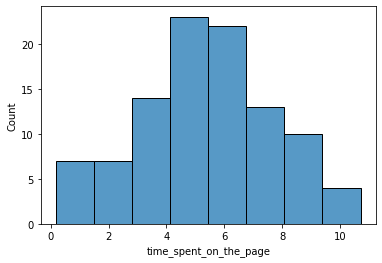

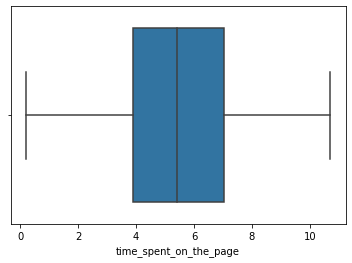

In [ ]:
# time spent on page (in minutes)
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

The histogram shows a normal distribution with little to no skewness. The boxplot futher supports that indication with relatively equal length whiskers and no extreme outliers.

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

There are an equal amount of users in both the control and treatment groups.


**Group (control/treatment)**

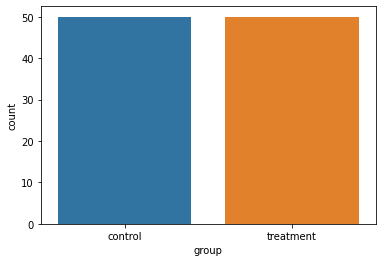

In [ ]:
# Countplot for each group type
sns.countplot(data=df,x='group')
plt.show()

**Landing Page**

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

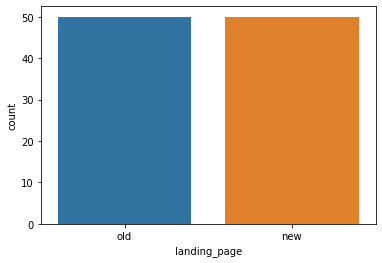

In [ ]:
# Countplot for each landing page
sns.countplot(data=df,x="landing_page")
plt.show()

**Converted (y/n)**

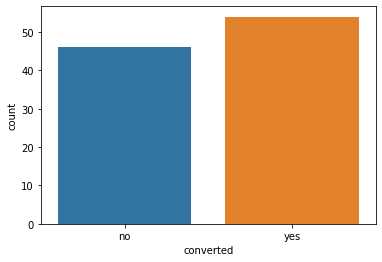

In [ ]:
sns.countplot(data=df,x="converted")
plt.show()

Around 54% were converted

**Language Preferred**

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

The lanaguage is distributed almost equally among 3 languages. 

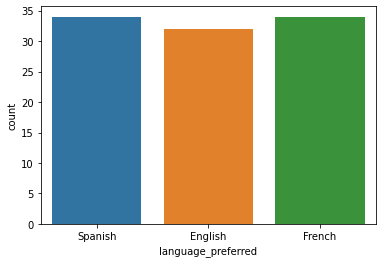

In [ ]:
sns.countplot(data=df,x='language_preferred')
plt.show()

spanish and french are 35%, while english is 32%

### Bivariate Analysis

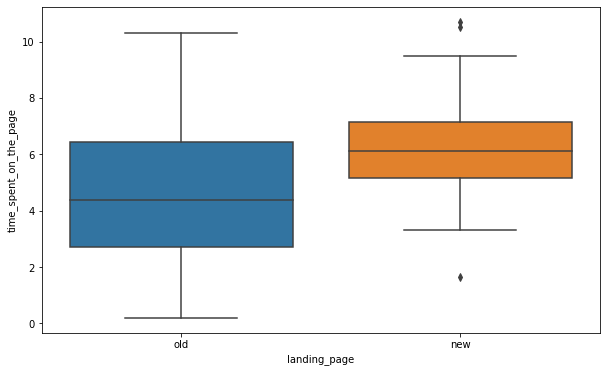

In [ ]:
# time spent on the new vs. old landing page
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

Based of the plot we can see that the average and maximum time spent on the new landing page is greater than that of the old landing page


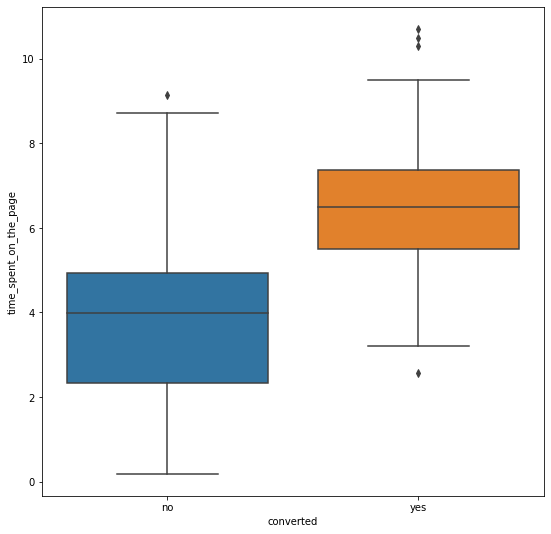

In [ ]:
# relationship between users who converted and the time spent on the page
plt.figure(figsize=(9, 9))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.show()

Those who converted spent more time on their respective pages


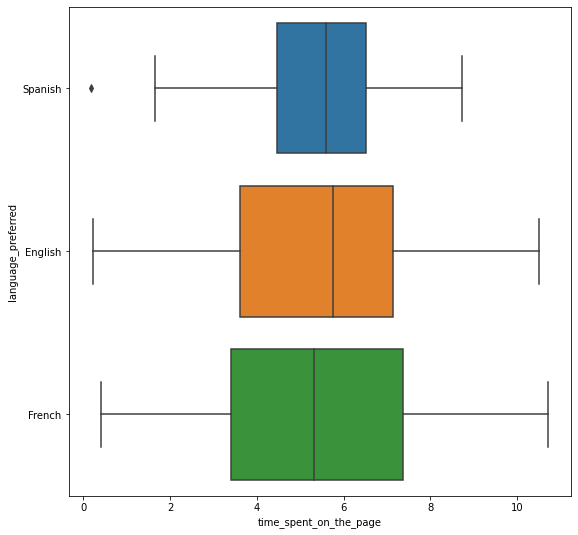

In [ ]:
#Shows the relationship between preferred language and time spent on page
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'language_preferred')
plt.show()

On average, all preferred languages spend about the same median time (~5-6 minutes) on their respective pages


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

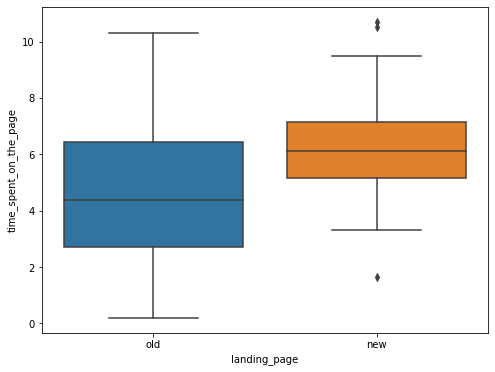

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_{0}$: $ u_{1} $ - $u_{2}$ = 0

$H_{A}$: $ u_{1} $ - $u_{2}$ > 0

Where u1 is the true average time spent on the new landing page and u2 is the true average time spent on the old landing page

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Based on this information, we will perform a 2 sample T-test.



### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼=0.05 .

### Step 4: Collect and prepare data

In [ ]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] 


In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


Although the sample standard deviations are different, since the sample sizes are large ( n > 30), the population standard deviations can be assumed to be equal.

Assumptions:
1. Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.

2. Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.

3. Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.

4. Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.


### Step 5: Calculate the p-value

In [ ]:
# Importing the required function
import scipy.stats as stats

# The code to calculate the p-value
test_stat,p_value = stats.ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = "greater")  

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is < 0.05, we can reject Ho (null hypothesis). There is suffcient evidence to say that the true mean time spent on the new landing page is greater than the time spent on the old landing page. 

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

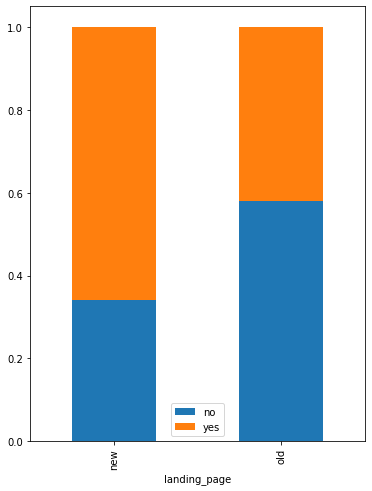

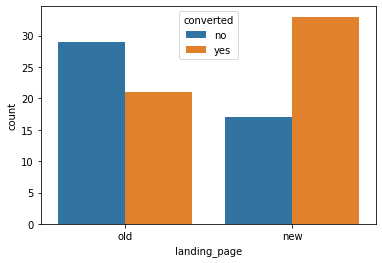

In [ ]:
# Visual comparison of the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

sns.countplot(data = df, x='landing_page',hue='converted');
plt.show()

### Step 1: Define the null and alternate **hypotheses**

$H_{0}$: $ π_{1} $ - $π_{2}$ = 0

$H_{A}$: $ π_{1} $ - $π_{2}$ > 0

Where π1 is the true proportion of converted subscribers on the new landing page and π2 is the true proportion of converted subscribers on the old landing page

### Step 2: Select Test
This is a one-tailed test concerning two population proportions from two independent populations. Based on this information, we will perform a 2 proportion Z test.



### Step 3: Decide significance level
As given in the problem statement, we select α = 0.05.




### Step 4: collect/prepare data


In [ ]:
#calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

tot_control = df.group.value_counts()['control'] # total number of users in the control group
tot_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(tot_control, tot_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


1. Binomally distributed population - Yes, a product is either defective or non-defective.
2. Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
3. Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.



*   33/50 * 200 and
1- (33/50) * 200


*   21/50 * 200 and
1- (21/50) * 200





### Step 5: calculate the p-value

In [ ]:
# Import the required function
import statsmodels.stats.proportion as stats   

# Code to calculate the p-value
test_stat, p_value = stats.proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ="larger")   

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7: Draw Inferences:
Since the p-value < 0.05, we reject the null hypothesis. Thus, is sufficient evidence to say that the true proportion of subscribers converted on the new landing page is greater than that of the old landing page.


## 3. Is the conversion and preferred language are independent or related?

Perform Visual Analysis

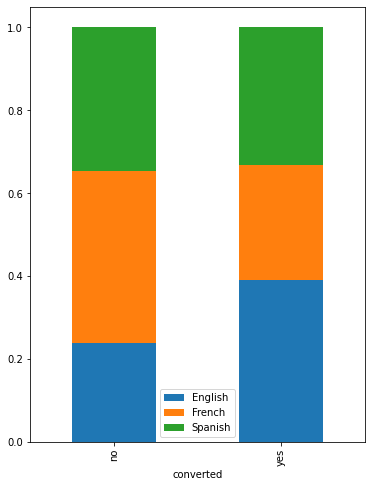

In [ ]:
# dependency between conversion status and preferred language
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()


## Step 1: Define the null and alternate hypotheses
$H_{0}$: There is no association between preferred language and conversion

$H_{A}$:There is a dependence bewtween preferred language and conversion

### Step 2: Select Appropriate test
This is a test of independence, concerning two categorical variables - converted status and preferred language. Based on this information, we will perform a chi-square test of independence.

### Step 3: Decide the significance level
As given in the problem statement, we select α = 0.05.

###Step 4: Collect and prepare data

In [ ]:
# we have to create a table in which weshow the dist. of the two variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


Assumptions:
1. Categorical variables - Yes
2. Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
3. Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 5: Calculate the p-value

In [ ]:

import scipy.stats as stats 
from scipy.stats import chi2_contingency


chi, p_value, dof, expected = chi2_contingency(contingency_table)
print("The p-value is", p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value to alpha

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Draw inference
Since the p-value is greater than alpha (Fail to reject null hypothesis), there is not sufficient evidence to indicate there is an association between between preferred language and conversion.

## 4. Is the time spent on the new page same for the different language users?

###Perform Visual Analysis

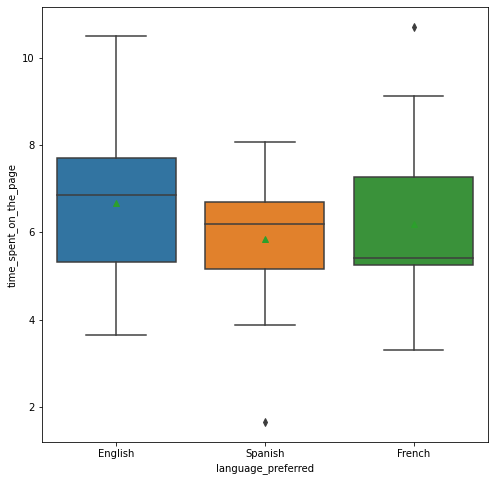

In [ ]:
df_new = df[df['landing_page'] == 'new']
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [ ]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

###Step 1: Define the null and alternate hypotheses


$H_{0}$: $ µ_{1} $ = $µ_{2}$ = 0 $µ_{3}$ = 0

$H_{A}$ At least one of the means is not the same 
 

µ1= where the true mean time spent on the new page with English as a preferred language

µ2 = the true mean time spent on the new page with French as a preferred language

µ3 = the true mean time spent on the new page with Spanish as a preferred language

###Step 2: Select Appropriate test

This problem concerns three population mean, thus we will use a one-way ANOVA test 

###Step 3: Decide the significance level
α = 0.05.

###Step 4: Collect and prepare data


In [ ]:
## we have to make a subset of the data on the time spent on each of the languages users'
time_spent_Eng = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_Fren = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   
time_spent_Span = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']


### Step 5: calculate the P-value 

In [ ]:

import scipy.stats as stats 
test_stat, p_val = stats.levene(time_spent_Eng, time_spent_Fren, time_spent_Span)   
print('The p-value is', p_val)


The p-value is 0.46711357711340173


### Step 6: compare the p-values 

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7: Conclusion/inferences 

Since the p-value is greater than alpha (Fail to reject null hypothesis), there is not sufficient evidence to indicate that any of the preferred languages affect the time spent on the new page

## Conclusion and Business Recommendations

1. There is no established relation between preferred language and time spent on page
2. There is no established relation between preferred language and conversion rate
3. We have enough statistical evidence to say users spend more time on average on the new page then on the old page
4. We have enough statistical evidence to say the conversion rate for the new page is greater than the conversion rate for the old page

___

### Recomendations
The new landing page  should be recommended for improving the conversion rate to gather new subscribers/users for the news portal. E-news Express should switch to the new landing page. 

